## Stacks pipeline batch 6 - notebook 3

This notebook contains post-stacks filtering steps for batch 6, *including HWE filtering*

<br>

### Filtering shell script

In [1]:
cd ../scripts/PostStacksFiltering/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts/PostStacksFiltering



<br>
**While working on batch 5**, I modified my original bash shell script so that i can filter out individuals with too much missing data BEFORE the minor allele frequency filtering and the loci missing data filtering. This should help retain more loci. The modifications include: 

1. A stop point before MAF filtering that allows you to pause the script and generate a new .genepop file without the missing individuals. You then type in the name of the new filtered file. 

2. Edits to the add_sample_to_genepop.py script to take the filtered file name. 

3. Edits to the INPUT FILE and to the remaining scripts to work off of a new population map that includes only retained individuals. 

In [2]:
!head genBASH_finalfilters_filterIndivids.py

### THIS SCRIPT GENERATES THE BASH SHELL THAT WILL RUN ALL OF THE EXTRA FILTERING STEPS AFTER POPULATIONS ###

## arguments: input file, pre-formatted
##MF 2/12/2017

## This was edited to allow you to filter individuals before you get to MAF and loci missing data filtering. 
## MF 6/26/2017

###################################################################################################



In [3]:
!python genBASH_finalfilters_filterIndivids.py Input_extrafilters_b6_7-8.txt

In [4]:
!head -n 20 PostStacksFiltering_b6_wgenome.sh

#!/bin/bash
### This shell script will run all of the lab's extra filtering scripts after populations ###
## M.Fisher 2/12/2017


echo 'Before running running this script, please be sure that you have the following:'
echo ''
echo '1. A single folder containing (1) stacks populations output, and (2) batch catalog files'
echo ''
echo '2. All additional python scripts listed in the input text file.'
echo ''
echo '3. The INPUT text file, UPDATED FOR YOUR DATA'
echo ''
echo 'Are you ready for the script to run? (yes/no)'
read ANSWER
if [ $ANSWER == 'no' ]; then
	exit 1
fi




#### 7/11/2017

In [5]:
!chmod +x PostStacksFiltering_b6_wgenome.sh

*This is an interactive script, so I ran it in the terminal...*

*Troubleshooting:* I kept getting a key error for locus 25210 when running `preparing_file_for_correcting_genotypes.py`. Although this locus appears to be missing in at least half of the individuals in the `.haplotypes` file, it is biallelic and is present in about 4 populations. I manually counted the number of individuals which have each genotype, and found that 32 individuals have A, 40 individuals have G, and 54 individuals have A/G. I'm just going to add this locus to the end of the biallelic catalog manually. (`25210 \t A \t G \t 140`).

*Additional steps:* I filtered out individuals with > 0.40 missing data before moving on to MAF filtering.

<br>
<br>


#### 7/12/2017

<br>
At the end of each step, I had the following number of loci:

**Biallelic, unfiltered:** 9,745 Loci

**After MAF Filtering:** 7,746 Loci

**After Missing Data (>0.20 missing genotypes at locus) Filtering:** 7,313 Loci
<br>

Filtered genepop output from shell script: **`batch_6.filteredMAF_filteredLoci`**

<br>


### Filtering individuals for missing data

I ended up doing two forms of the missing data filtering for individuals. When I set the cut-off at 0.20, I filtered out 14 individuals. When I set the cut-off at 0.30, I only lost one individual. So I'm going to make `genepops` out of both, pending Lorenz's feedback.  

**After Missing Data (>0.20 missing genotypes in individual) Filtering:** 7,313 Loci and 234 Individuals

**After Missing Data (>0.20 missing genotypes in individual) Filtering:** 7,313 Loci and 247 Individuals

<br>

**FINAL FILTERED GENEPOP: `batch_6.filteredMAF_filteredLoci_20filteredIndivids.txt`OR `batch_6.filteredMAF_filteredLoci_30filteredIndivids.txt`**

<br>
<br>


### Conversion of final filtered genepop to R genepop format

In [2]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/notebooks'

In [3]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [4]:
cd PostStacksFiltering/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts/PostStacksFiltering


In [5]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


#### Run genepop

In [7]:
!python genepop_conversion_forR_fromTAB_b4.py \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids.gen

#### 7/13/2017

In [33]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [34]:
!python genepop_conversion_forR_fromTAB_b6.py \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids.gen

In [35]:
!python genepop_conversion_forR_fromTAB_b6_20.py \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids.gen

### HWE Filtering: 0.30 Individual Filter


#### 7/14/2017

On the genepop file `batch_6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids.txt`


Use the options: 1... Hardy-Weinberg exact tests >> 3...test for each locus in each population, Probability test


In [36]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


#### Parse genepop output

In [37]:
!python parse_genepop_HWEbylocus.py \
-p ../stacks_b6_wgenome/batch_6_filteredMAF_filteredLoci_30filteredIndivids.txt.P \
-op batch_6_30_HWEpvals.txt \
-of batch_6_30_Fis.txt

generating dictionaries of pvalues and fis values...
writing output to files...
done.


In [38]:
from scipy.stats import chisqprob

In [39]:
import numpy as np

#### Filter loci out of HWE

In [40]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [41]:
## STEP ONE: conduct chisquare and determine loci out of HWE. 
## write results to a file and save a list of the loci out of HWE. 

infile = open("batch_6_30_HWEpvals.txt", "r")
outfile = open("batch_6_30_HWEchisquare.txt", "w")

outfile.write("locus\tChiSquare\tdf\tpvalue\n")

sig_count = 0
loci_to_discard = []

for line in infile:
    if "locus" not in line:
        linelist= line.strip().split()
        outfile.write(linelist[0]) #write locus name to outfile
        sum = 0 #sum of ln(pvals)
        n_pops = 0 # number of pops with pvals (some will have NAs)
        for i in range(1,8):
            if linelist[i] != "NA" and float(linelist[i]) == 0.0:
                newval = np.log(float(0.00000000001))
                sum += newval
                n_pops += 1
            elif linelist[i] != "NA" and float(linelist[i]) != 0.0:
                newval = np.log(float(linelist[i]))
                sum += newval
                n_pops += 1
        chisquare = float(-2) * float(sum)
        df = n_pops * 2
        outfile.write("\t" + str(chisquare) + "\t" + str(df))
        pvalue = chisqprob(chisquare,df)
        if pvalue < 0.05:
            sig_count += 1
            loci_to_discard.append(linelist[0])
        outfile.write("\t" + str(pvalue) + "\n")
infile.close()
outfile.close()

print "You have ", sig_count, " loci out of HWE"

You have  689  loci out of HWE


In [42]:
## STEP TWO: rewrite the file of HWEpvals by locus by population, 
## excluding those loci out of HWE. 

infile = open("batch_6_30_HWEpvals.txt", "r")
outfile = open("batch_6_30_HWEpvals_filtered.txt", "w")

locus_count = 0

for line in infile:
    if line.startswith("#"):
        outfile.write("parsed GENEPOP output, HWE p-values by locus by population FILTERED #\n")
    elif line.startswith("locus"):
        outfile.write(line)
    else:
        locus = line.strip().split()[0]
        if locus not in loci_to_discard:
            outfile.write(line)
            locus_count += 1
infile.close()
outfile.close()
print locus_count, " loci written to output file."

6624  loci written to output file.


#### Create new genepop with filtered loci

In [43]:
## STEP ONE: create a list of the loci to keep 
infile = open("batch_6_30_HWEpvals_filtered.txt", "r")

filtered_loci = []

for line in infile:
    if "locus" not in line:
        filtered_loci.append(line.strip().split()[0])

infile.close()

## STEP TWO: write out the genotypes for the loci to keep to a new genepop
## STEP THREE: write out the genotypes for loci out of HWE to different file
old_genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids", "r")
new_genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.txt", "w")
bad_genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_BADhwe.txt", "w")

for line in old_genepop:
    if line.startswith("sample"):
        new_genepop.write(line)
        bad_genepop.write(line)
    else: 
        locus_id = line.strip().split("\t")[0]
        if locus_id in filtered_loci:
            new_genepop.write(line)
        else:
            bad_genepop.write(line)
old_genepop.close()
new_genepop.close()
bad_genepop.close()

In [44]:
## STEP FOUR: check to make sure only loci in HWE are now in genepop

print "There are ", len(filtered_loci), " loci in filtered list"

count = 0
good_filter = []
bad_filter = []
genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.txt", "r")
for line in genepop:
    if "sample" not in line:
        locus_id = line.strip().split()[0]
        count += 1
        if locus_id in filtered_loci:
            good_filter.append(locus_id)
        elif locus_id not in filtered_loci:
            bad_filter.append(locus_id)
genepop.close()

print "There are ", count, " loci in your filtered genepop file"
print len(bad_filter), " loci have not been filtered appropriately"
            

There are  6624  loci in filtered list
There are  6624  loci in your filtered genepop file
0  loci have not been filtered appropriately


#### Create Final Genepop File

In [45]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [46]:
!python genepop_conversion_forR_fromTAB_b6.py \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.txt \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.gen

** Compare distributions of pvalues**

In [3]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/notebooks'

In [4]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
infile = open("batch_6_30_HWEpvals.txt", "r")

percents = []
loci_list = []
na_count = 0

for line in infile:
    if "locus" not in line:
        if line.strip().split()[10] != "NA":
            new_percent = float(line.strip().split()[10])
            percents.append(new_percent)
            loci_list.append(line.strip().split()[0])
        elif line.strip().split()[10] == "NA":
            na_count += 1

infile.close()

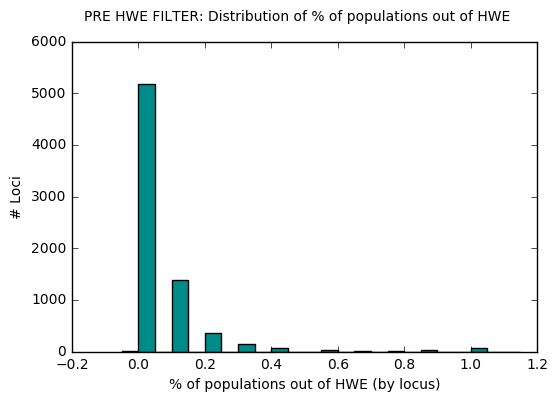

In [7]:
plt.hist(percents, bins = np.arange(-0.1, 1.1, .05)+0.05, color = "darkcyan")
plt.suptitle("PRE HWE FILTER: Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [8]:
plt.close()

In [9]:
infile = open("batch_6_30_HWEpvals_filtered.txt", "r")

percents = []
loci_list = []
na_count = 0

for line in infile:
    if "locus" not in line:
        if line.strip().split()[10] != "NA":
            new_percent = float(line.strip().split()[10])
            percents.append(new_percent)
            loci_list.append(line.strip().split()[0])
        elif line.strip().split()[10] == "NA":
            na_count += 1

infile.close()

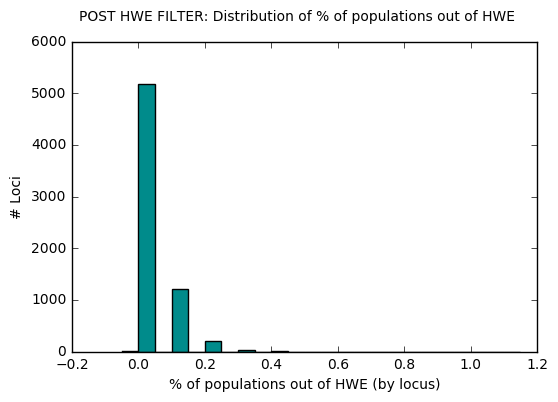

In [10]:
plt.hist(percents, bins = np.arange(-0.1, 1.1, .05)+0.05, color = "darkcyan")
plt.suptitle("POST HWE FILTER: Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [11]:
plt.close()


<br>
<br>

### HWE Filtering: 0.20 Individual Filter

#### 7/14/2017


On the genepop file batch_6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids.txt
Use the options: 1... Hardy-Weinberg exact tests >> 3...test for each locus in each population, Probability test

In [47]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


** Parse Genepop output**

In [48]:
!python parse_genepop_HWEbylocus.py \
-p ../stacks_b6_wgenome/batch_6_filteredMAF_filteredLoci_20filteredIndivids.txt.P \
-op batch_6_20_HWEpvals.txt \
-of batch_6_20_Fis.txt

generating dictionaries of pvalues and fis values...
writing output to files...
done.


In [49]:
from scipy.stats import chisqprob
import numpy as np

**Filter Loci out of HWE**

In [50]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [51]:
## STEP ONE: conduct chisquare and determine loci out of HWE. 
## write results to a file and save a list of the loci out of HWE. 

infile = open("batch_6_20_HWEpvals.txt", "r")
outfile = open("batch_6_20_HWEchisquare.txt", "w")

outfile.write("locus\tChiSquare\tdf\tpvalue\n")

sig_count = 0
loci_to_discard = []

for line in infile:
    if "locus" not in line:
        linelist= line.strip().split()
        outfile.write(linelist[0]) #write locus name to outfile
        sum = 0 #sum of ln(pvals)
        n_pops = 0 # number of pops with pvals (some will have NAs)
        for i in range(1,8):
            if linelist[i] != "NA" and float(linelist[i]) == 0.0:
                newval = np.log(float(0.00000000001))
                sum += newval
                n_pops += 1
            elif linelist[i] != "NA" and float(linelist[i]) != 0.0:
                newval = np.log(float(linelist[i]))
                sum += newval
                n_pops += 1
        chisquare = float(-2) * float(sum)
        df = n_pops * 2
        outfile.write("\t" + str(chisquare) + "\t" + str(df))
        pvalue = chisqprob(chisquare,df)
        if pvalue < 0.05:
            sig_count += 1
            loci_to_discard.append(linelist[0])
        outfile.write("\t" + str(pvalue) + "\n")
infile.close()
outfile.close()

print "You have ", sig_count, " loci out of HWE"

You have  676  loci out of HWE


In [52]:
## STEP TWO: rewrite the file of HWEpvals by locus by population, 
## excluding those loci out of HWE. 

infile = open("batch_6_20_HWEpvals.txt", "r")
outfile = open("batch_6_20_HWEpvals_filtered.txt", "w")

locus_count = 0

for line in infile:
    if line.startswith("#"):
        outfile.write("parsed GENEPOP output, HWE p-values by locus by population FILTERED #\n")
    elif line.startswith("locus"):
        outfile.write(line)
    else:
        locus = line.strip().split()[0]
        if locus not in loci_to_discard:
            outfile.write(line)
            locus_count += 1
infile.close()
outfile.close()
print locus_count, " loci written to output file."

6637  loci written to output file.


**Create new genepop with filtered loci**

In [53]:
## STEP ONE: create a list of the loci to keep 
infile = open("batch_6_20_HWEpvals_filtered.txt", "r")

filtered_loci = []

for line in infile:
    if "locus" not in line:
        filtered_loci.append(line.strip().split()[0])

infile.close()

## STEP TWO: write out the genotypes for the loci to keep to a new genepop
## STEP THREE: write out the genotypes for loci out of HWE to different file
old_genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids", "r")
new_genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids_filteredHWE.txt", "w")
bad_genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids_BADhwe.txt", "w")

for line in old_genepop:
    if line.startswith("sample"):
        new_genepop.write(line)
        bad_genepop.write(line)
    else: 
        locus_id = line.strip().split("\t")[0]
        if locus_id in filtered_loci:
            new_genepop.write(line)
        else:
            bad_genepop.write(line)
old_genepop.close()
new_genepop.close()
bad_genepop.close()

In [54]:
## STEP FOUR: check to make sure only loci in HWE are now in genepop

print "There are ", len(filtered_loci), " loci in filtered list"

count = 0
good_filter = []
bad_filter = []
genepop = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids_filteredHWE.txt", "r")
for line in genepop:
    if "sample" not in line:
        locus_id = line.strip().split()[0]
        count += 1
        if locus_id in filtered_loci:
            good_filter.append(locus_id)
        elif locus_id not in filtered_loci:
            bad_filter.append(locus_id)
genepop.close()

print "There are ", count, " loci in your filtered genepop file"
print len(bad_filter), " loci have not been filtered appropriately"
            

There are  6637  loci in filtered list
There are  6637  loci in your filtered genepop file
0  loci have not been filtered appropriately


**Create genepop file**

In [55]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [56]:
!python genepop_conversion_forR_fromTAB_b6_20.py \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids_filteredHWE.txt \
../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_20filteredIndivids_filteredHWE.gen